In [1]:
import pandas as pd
import csv
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

In [2]:
DATA = Path("metrics2")
OUT = "metrics2.csv"

In [5]:
with open(OUT, "w") as out:
    fields = ["step", "mean_bleu", "std_bleu", "mean_bertscore", "std_bertscore", "mean_sembscore", "std_sembscore", "mean_radgraphcombined", "std_radgraphcombined", "mean_cxrmetric", "std_cxrmetric"]
    writer = csv.DictWriter(out, fieldnames=fields)

    writer.writeheader()

    for i in tqdm(range(100, 1800, 100), total=17):
        metrics = pd.read_csv(DATA / f"{i}_metrics.csv")
        writer.writerow({
            "step": i,
            "mean_bleu": metrics["bleu_score"].mean(),
            "std_bleu": metrics["bleu_score"].std(),
            "mean_bertscore": metrics["bertscore"].mean(),
            "std_bertscore": metrics["bertscore"].std(),
            "mean_sembscore": metrics["semb_score"].mean(),
            "std_sembscore": metrics["semb_score"].std(),
            "mean_radgraphcombined": metrics["radgraph_combined"].mean(),
            "std_radgraphcombined": metrics["radgraph_combined"].std(),
            "mean_cxrmetric": metrics["cxr_metric_score"].mean(),
            "std_cxrmetric": metrics["cxr_metric_score"].std()
        })

100%|██████████| 17/17 [00:00<00:00, 69.36it/s]


# Analyze single step data

In [4]:
dfs = {}

for i in tqdm(range(100, 2500, 100), total=24):
    dfs[i] = pd.read_csv(DATA / f"{i}_metrics.csv")

100%|██████████| 24/24 [00:00<00:00, 92.75it/s]


In [5]:
# In each df, add a column report_length that is the length of the report
for i in tqdm(range(100, 2500, 100), total=24):
    dfs[i]["report_length"] = dfs[i]["report"].apply(lambda x: len(x))

100%|██████████| 24/24 [00:00<00:00, 418.39it/s]


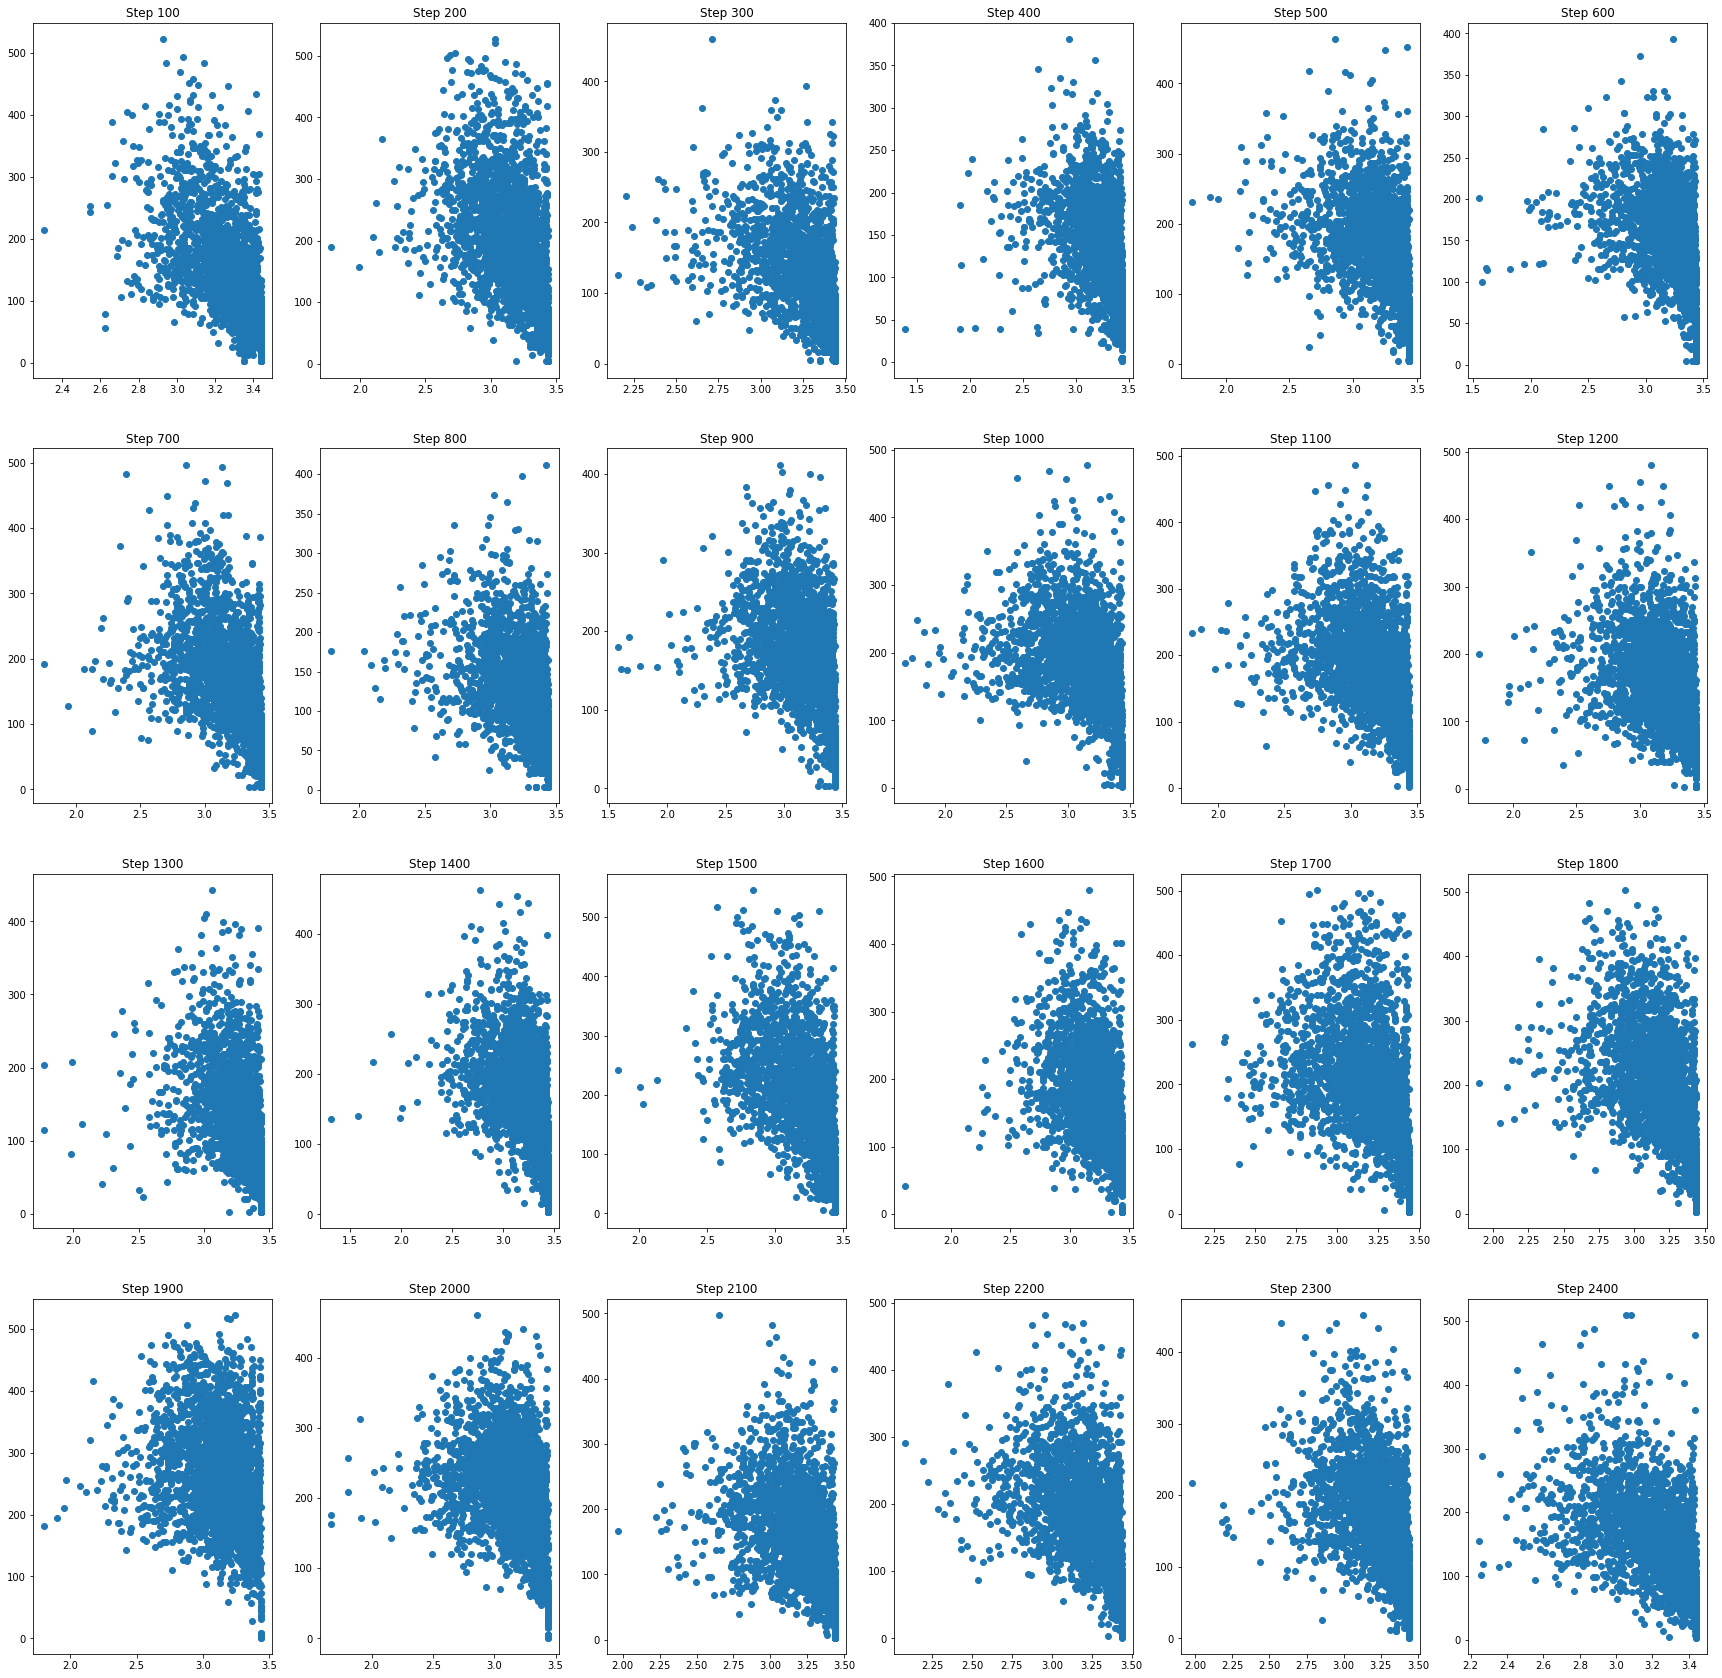

In [7]:
# create subplots
fig, axs = plt.subplots(4, 6, figsize=(30, 30))

# Plot cxr metric score vs report length
for i, ax in zip(range(100, 2500, 100), axs.flatten()):
    ax.scatter(dfs[i]["cxr_metric_score"], dfs[i]["report_length"])
    ax.set_title(f"Step {i}")